In [1]:
import pandas as pd

In [2]:
df_boston = pd.read_csv('Boston House Prices.csv')
df_boston

Rooms  Distance  Value
0    6.575    4.0900   24.0
1    6.421    4.9671   21.6
2    7.185    4.9671   34.7
3    6.998    6.0622   33.4
4    7.147    6.0622   36.2
..     ...       ...    ...
501  6.593    2.4786   22.4
502  6.120    2.2875   20.6
503  6.976    2.1675   23.9
504  6.794    2.3889   22.0
505  6.030    2.5050   11.9

[506 rows x 3 columns]

# Regresion Lineal con Statsmodels

In [4]:
import statsmodels.api as sm

## Regresion Lineal Simple

### Definir las variables dependientes e independientes

In [5]:
y = df_boston['Value'] # variable dependiente
x = df_boston['Rooms'] # variable independiente

### Explorar el dataset

<AxesSubplot:xlabel='Rooms', ylabel='Value'>

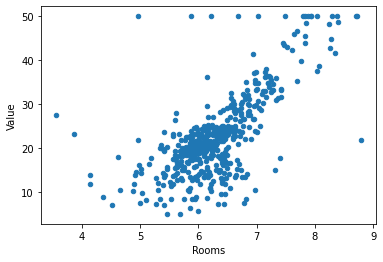

In [6]:
df_boston.plot(kind='scatter',
               x='Rooms',
               y='Value')

### Crear la regresion: Agregar constante y ajustar modelo

Statmodels doesn't add a constant by default, so we have to do it on our own

In [7]:
x = sm.add_constant(x) # agregar una constante
lm = sm.OLS(y,x).fit() # ajustar el modelo

In [8]:
lm.predict(x)

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

### La Table de Regresion

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           2.49e-74
Time:                        19:15:26   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
Rooms          9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ecuacion de la Regresion Lineal 

In [10]:
# Coef Rooms: 9.1021
# Coef Constant: - 34.6706

# Ecuacion lineal: 𝑦 = 𝑎𝑥 + 𝑏
y_pred = 9.1021*x['Rooms'] - 34.6706

### Graficar la Regresion Lineal

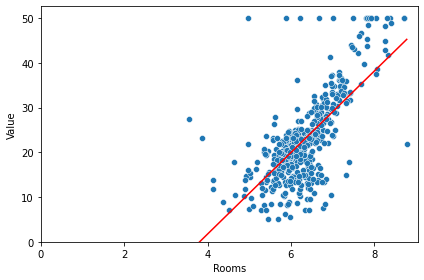

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# graficar los puntos
plt.figure(figsize=(6, 4), tight_layout=True)
sns.scatterplot(x=x['Rooms'], y=y)

# graficar la linea
sns.lineplot(x=x['Rooms'],y=y_pred, color='red')

# axis
plt.xlim(0)
plt.ylim(0)
plt.savefig('linear_regression')
plt.show()